# LetsGrowMore (Virtual Internship Program)




# Stock Market Prediction and Forecasting Using Stacked LSTM

Author : Shubham Satish Shinde

In [46]:
# import necessary libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [47]:
# import the Data

data_F = pd.read_csv('NSE-TATAGLOBAL.csv')
data_F = data_F.dropna()
data_F.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [48]:
data_F.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [49]:
data_F_close = data_F['Close']

In [50]:
data_F_close.shape

(2035,)

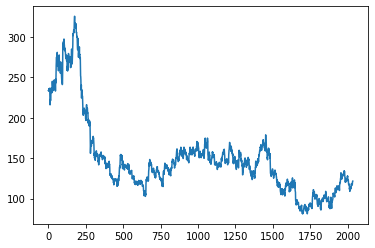

In [51]:
plt.plot(data_F_close)

since LSTM are sensitive to the scale of the data. So we apply MinMax scalar to transform our values between 0 and 1.

In [52]:
scaler_data = MinMaxScaler(feature_range=(0, 1))
data_F_close = scaler_data.fit_transform(np.array(data_F_close).reshape(-1, 1))

In [53]:
data_F_close.shape

(2035, 1)

In [54]:
data_F_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [55]:
# split the data into train and teat split

training_size = int(len(data_F_close) * 0.70)
test_size = len(data_F_close) - training_size
train_data, test_data = data_F_close[0: training_size,:], data_F_close[training_size: len(data_F_close),:1]

In [56]:
# creating the function

def create_dataset(dataset, times_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - times_step - 1):
        b = dataset[i:(i+times_step), 0]
        dataX.append(b)
        dataY.append(dataset [i+times_step, 0])
    return np.array(dataX), np.array(dataY)

In [57]:
times_step = 100
x_train, y_train = create_dataset(train_data, times_step)
x_test, y_test = create_dataset(test_data, times_step)


In [58]:
# Reshape the input

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [59]:
# Creating the LSTM Model

model_L = Sequential()
model_L.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model_L.add(LSTM(50, return_sequences = True))
model_L.add(LSTM(50))
model_L.add(Dense(1))
model_L.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [60]:
model_L.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Fitting The Model

model_L.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100
21/21 [==============================] - 13s 268ms/step - loss: 0.0287 - val_loss: 0.0030
Epoch 2/100
21/21 [==============================] - 5s 258ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 3/100
21/21 [==============================] - 5s 222ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
21/21 [==============================] - 5s 239ms/step - loss: 0.0016 - val_loss: 8.8761e-04
Epoch 5/100
21/21 [==============================] - 5s 219ms/step - loss: 0.0015 - val_loss: 8.6543e-04
Epoch 6/100
21/21 [==============================] - 5s 217ms/step - loss: 0.0014 - val_loss: 8.6402e-04
Epoch 7/100
21/21 [==============================] - 4s 199ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
21/21 [==============================] - 4s 197ms/step - loss: 0.0014 - val_loss: 9.7367e-04
Epoch 9/100
21/21 [==============================] - 5s 219ms/step - loss: 0.0012 - val_loss: 9.8590e-04
Epoch 10/100
21/21 [==============================] - 4s 204ms/step - 

In [62]:
# Predicting and Checking performance matrics

training_predicted = model_L.predict(x_train)
testing_predicted = model_L.predict(x_test)

In [63]:
#Transforming back to the original form

training_predicted = scaler_data.inverse_transform(training_predicted)
testing_predicted = scaler_data.inverse_transform(testing_predicted)

In [64]:
# Calculating RMSE performance matrics

math.sqrt(mean_squared_error(y_train, training_predicted))



163.74441110958026

In [65]:
# Test data RMSE

math.sqrt(mean_squared_error(y_test, testing_predicted))


108.12119885812257

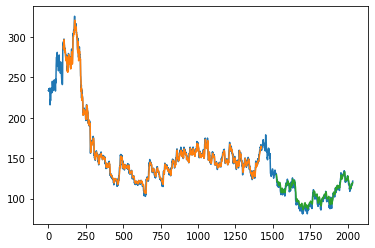

In [66]:
# Plotting

#Shifting train prediction for plotting

lb = 100
training_predicted_Plot = np.empty_like(data_F_close)
training_predicted_Plot[:,:] = np.nan
training_predicted_Plot[lb:len(training_predicted) + lb, :] = training_predicted

#Shifting Train Prediction for plotting

testing_predicted_Plot = np.empty_like(data_F_close)
testing_predicted_Plot[:,:] = np.nan
testing_predicted_Plot[len(training_predicted) + (lb * 2) + 1: len(data_F_close) - 1, :] = testing_predicted

#Plotting baseline and Predictions

plt.plot(scaler_data.inverse_transform(data_F_close))
plt.plot(training_predicted_Plot)
plt.plot(testing_predicted_Plot)
plt.show()

predict the next 30 days Stock Price


In [67]:
len(test_data), x_test.shape

(611, (510, 100, 1))

In [68]:
x_input = test_data[511:].reshape(1, -1)
x_input.shape

(1, 100)

In [69]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [70]:
l_output = []
n_steps = 100
next_Number_Of_Days = 30
i = 0

while(i < next_Number_Of_Days):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {} ".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yp = model_L.predict(x_input, verbose = 0)
        print("{} day output {} ".format(i, yp))
        temp_input.extend(yp[0].tolist())
        temp_input = temp_input[1:]
        l_output.extend(yp.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yp = model_L.predict(x_input, verbose = 0)
        print(yp[0])
        temp_input.extend(yp[0].tolist())
        print(len(temp_input))
        l_output.extend(yp.tolist())
        i = i+1

print(l_output)

[0.16479377]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [71]:
new_day = np.arange(1,101)
day_pred = np.arange(101,131)

In [72]:
data_F2 = data_F_close.tolist()
data_F2.extend(l_output)

In [73]:
len(data_F_close)

2035

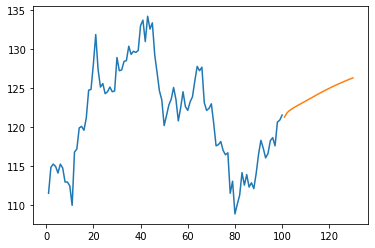

In [74]:
plt.plot (new_day, scaler_data.inverse_transform(data_F_close[1935:]))
plt.plot (day_pred, scaler_data.inverse_transform(l_output))